SOURCE : https://www.kaggle.com/datasets/msambare/fer2013/data

# DATA PREPROCESSING:
** STEPS:
1. Importing the necessary libraries.
2. Loading and exploring the dataset.
3. Applying data augmentation and normalization.
4. Spliting the dataset into training, validation, and test sets.
5. Preparing data for model input.

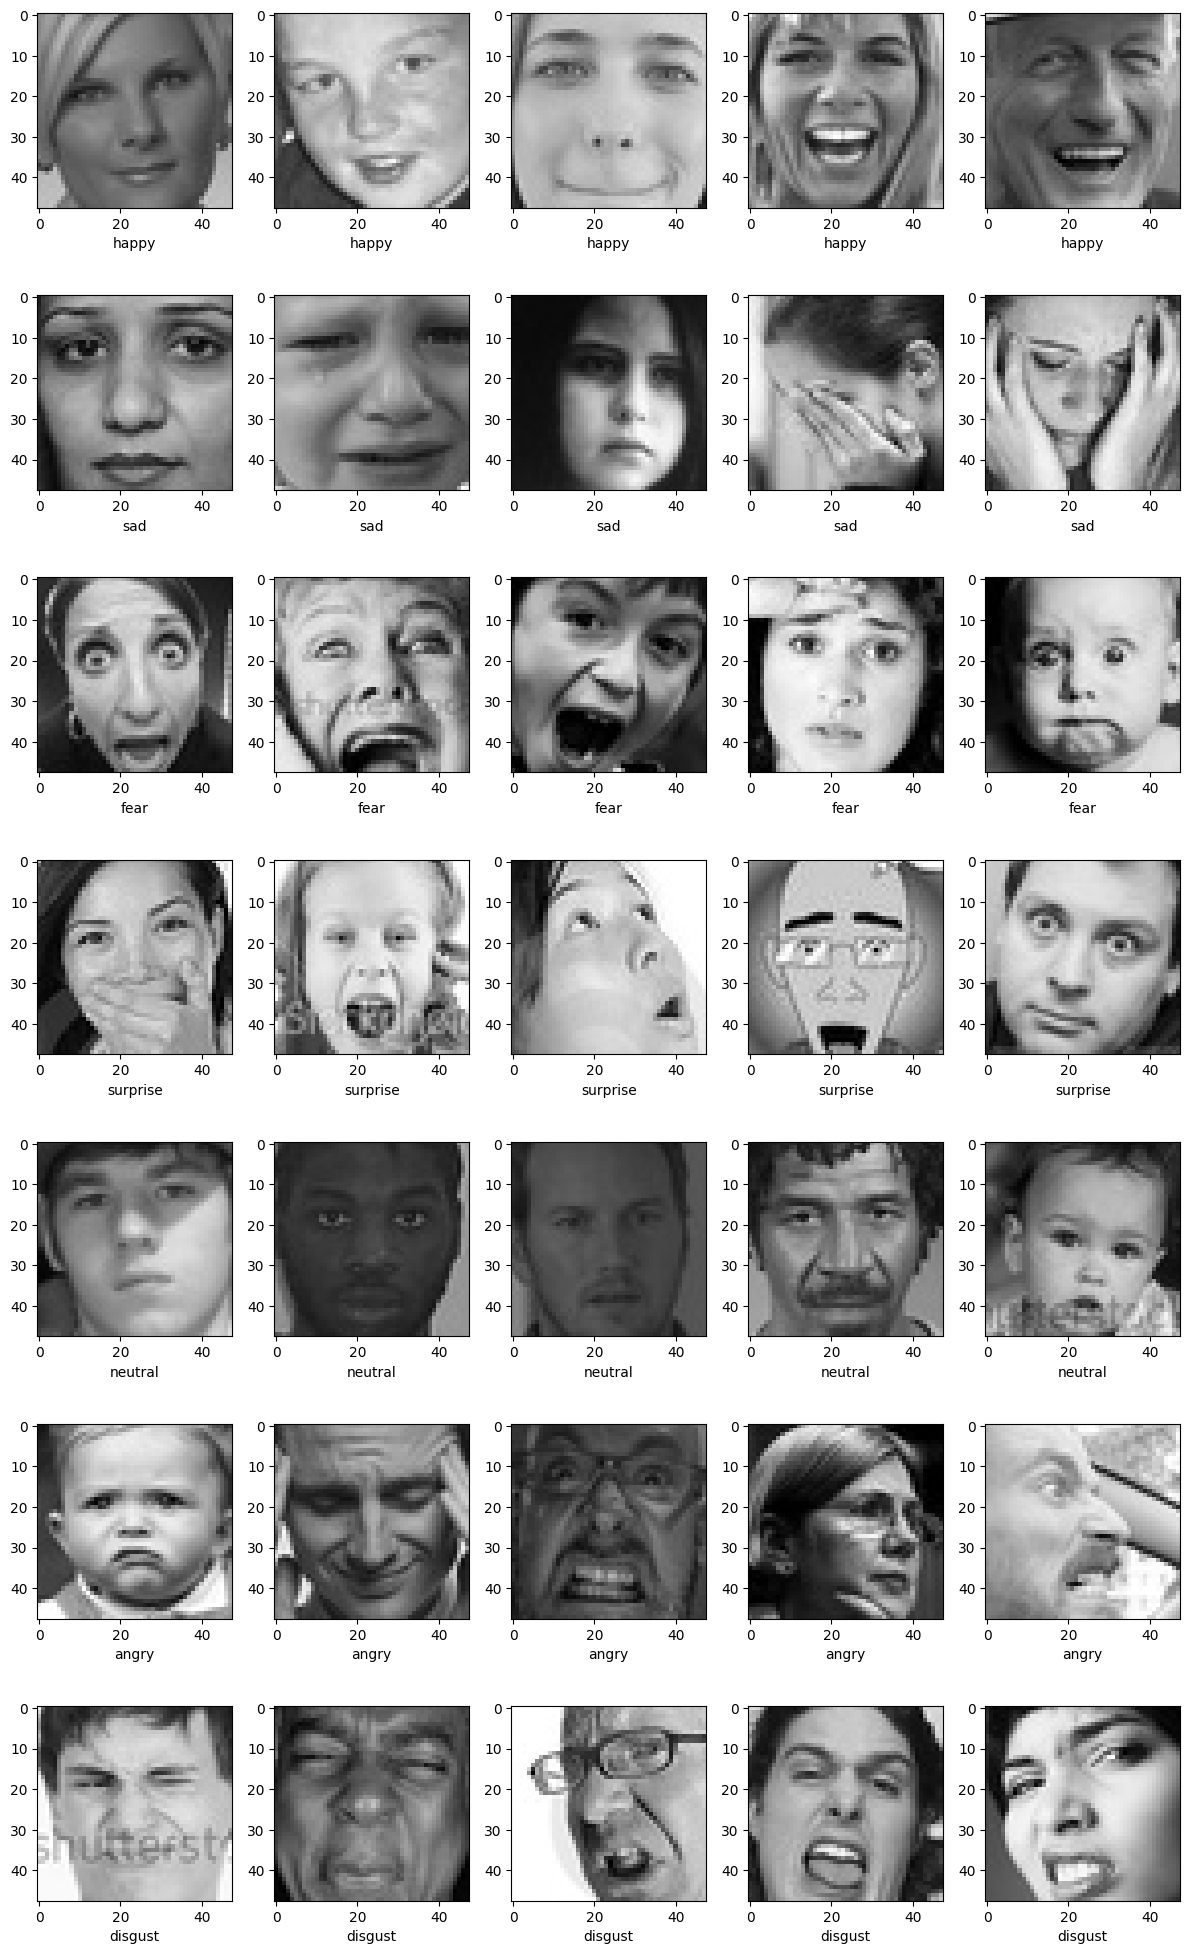

In [13]:
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import os

# Size of the image: 48x48 pixels
pic_size = 48

# Input path for the images
base_path = "/Users/pratiksha/Documents/Pratiksha/Documents/GitHub/GitHub/Face-expression-recognition-with-Deep-Learning/archive (3)/"

plt.figure(0, figsize=(12,20))
cpt = 0
# Iterate through each expression folder in the train directory
for expression in os.listdir(base_path + "train/"):
    # Skip non-directory files like .DS_Store
    if not os.path.isdir(os.path.join(base_path + "train/", expression)):
        continue
    
    for i in range(1, 6):
        cpt += 1
        plt.subplot(7, 5, cpt)
        
        # Load and display the image
        img_path = os.path.join(base_path, "train", expression, os.listdir(os.path.join(base_path, "train", expression))[i])
        img = load_img(img_path, target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")
        plt.xlabel(expression)  # Show expression label as xlabel

plt.tight_layout()
plt.show()

